# Neural Networks with Keras

In [1]:
from __future__ import print_function
import random
import numpy as np
import pandas as pd
from math import sin

# pip install keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD   # Stochastic Gradient Descent

from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
import sklearn.cross_validation as cv

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (8, 8)

Using TensorFlow backend.


Couldn't import dot_parser, loading of dot files will not be possible.


/Users/rkelley/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Neural Network Regression

### Polynomial Regression

Let's train a neural network on a few different shapes. First we start with a polynomial (a cubic).

In [6]:
# Create some data

def f(x):
    return x ** 3 - 5 * x + 12 + random.random()

X = np.linspace(-1, 1, 1000).reshape(-1, 1)
y = np.array(list(map(f, X)))

print(X.shape, y.shape)

(1000, 1) (1000, 1)


In [3]:
# Define a Feed Forward NN
model = Sequential()
model.add(Dense(input_dim=1, units=5))
model.add(Activation('tanh'))
model.add(Dense(input_dim=5, units=1))
model.add(Activation('linear'))

#   lr: learning rate
model.compile(loss='mse', optimizer=SGD(lr=0.01))

In [ ]:
# Train the model
print('Training...')
loss = model.fit(X, y, epochs=500, validation_split=0.1, 
                 batch_size=128, verbose=False)
print(loss.history['loss'][-1])
print("Done")

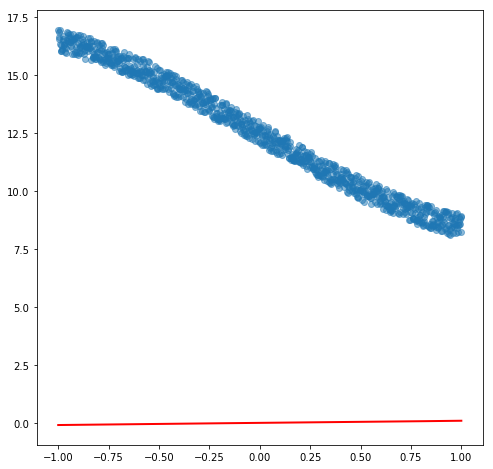

MSE 162.727820246


In [4]:
# Plot the predictions
predictions = model.predict(X)

plt.scatter(X, y, alpha=0.5)
plt.plot(X, predictions, color='r', linewidth=2)
plt.show()
print("MSE", mean_squared_error(predictions, y))

### Sine Regression

In [7]:
# Sine data
X = np.linspace(0, 2 * np.pi, 500).reshape(-1,1)
y = np.sin(X)

print(X.shape, y.shape)

(500, 1) (500, 1)


In [8]:
# Create the model
model = Sequential()
model.add(Dense(input_dim=1, units=5))
model.add(Activation('tanh'))
model.add(Dense(input_dim=5, units=1))
model.add(Activation('linear'))

#   lr: learning rate
model.compile(loss='mse', optimizer=SGD(lr=0.1))

### Train the Model

In [9]:
print('Training..')
loss = model.fit(X, y, epochs=150, validation_split=0.1, 
                 batch_size=128, verbose=False)
print(loss.history['loss'][-1])
print('Complete')

Training..
0.0165290021565
Complete


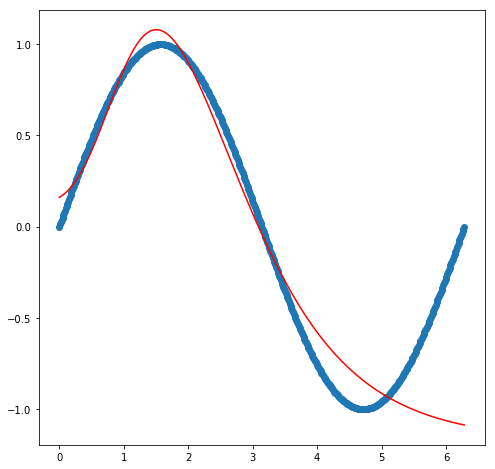

MSE 0.0751069017684


In [10]:
# Plot the predictions
predictions = model.predict(X)

plt.scatter(X, y)
plt.plot(X, predictions, color='r')
plt.show()
print("MSE", mean_squared_error(predictions, y))

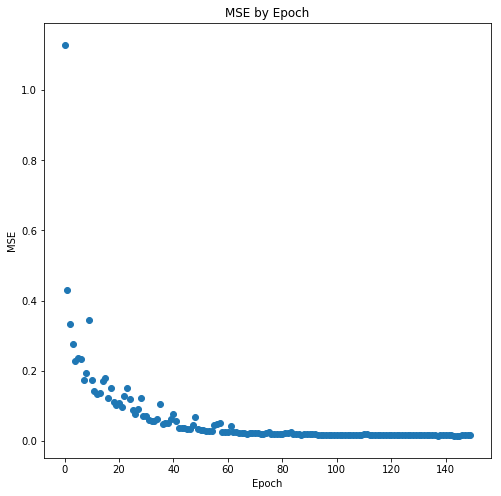

In [11]:
# Plot the error over time

plt.scatter(range(len(loss.history['loss'])), loss.history['loss'])

# plt.scatter(range(len(loss.history['val_loss'])), loss.history['val_loss'], color='red')

plt.xlabel('Epoch')
plt.ylabel('MSE')

plt.title('MSE by Epoch')

### Train longer

If we train for more epochs, we can get a better regression.

(1000, 1) (1000, 1)
Training..
3.90658940321e-05
Complete


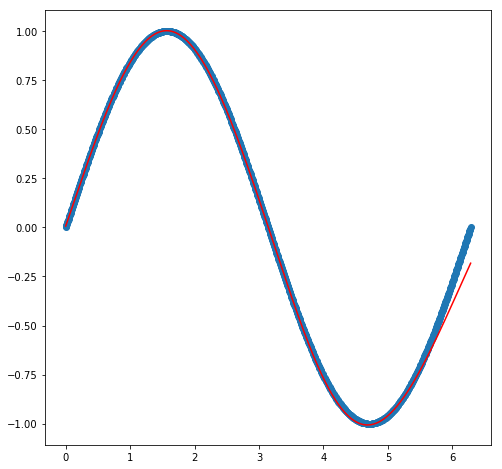

MSE 0.00136510263365


In [12]:
X = np.linspace(0, 2 * np.pi, 1000).reshape(-1,1)
y = np.sin(X)

print(X.shape, y.shape)

model = Sequential()
model.add(Dense(input_dim=1, units=5))
model.add(Activation('tanh'))
model.add(Dense(input_dim=5, units=1))
model.add(Activation('linear'))

#   lr: learning rate
model.compile(loss='mse', optimizer=SGD(lr=0.05))

print('Training..')
loss = model.fit(X, y, epochs=15000, validation_split=0.1, 
                 batch_size=128, verbose=False)
print(loss.history['loss'][-1])
print('Complete')

# Plot
predictions = model.predict(X)

plt.scatter(X, y)
plt.plot(X, predictions, color='r')
plt.show()
print("MSE", mean_squared_error(predictions, y))

We can take a closer look at the error per training epoch.

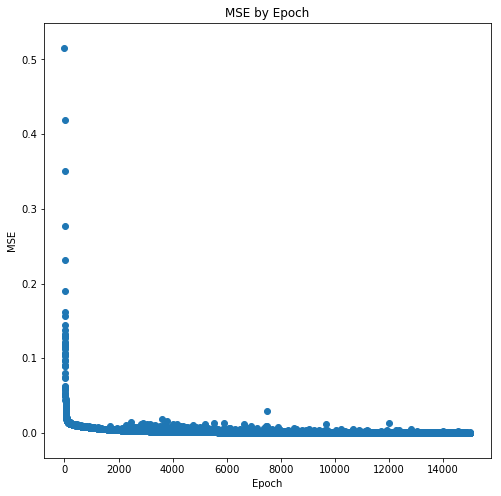

In [13]:
# Plot the error over time

plt.scatter(range(len(loss.history['loss'])), loss.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('MSE by Epoch')

In [ ]:
def f(x):
    return x ** 2 * np.sin(x**2)

# Sine data
X = np.linspace(2, np.pi, 1000).reshape(-1,1)
y = np.array(list(map(f, X)))

print(X.shape, y.shape)

In [ ]:
## Solution

model = Sequential()
model.add(Dense(input_dim=1, units=5))
model.add(Activation('tanh'))
model.add(Dense(input_dim=5, units=5))
model.add(Activation('tanh'))
model.add(Dense(input_dim=5, units=1))
model.add(Activation('linear'))

#   lr: learning rate
model.compile(loss='mse', optimizer=SGD(lr=0.005))

print('Training..')
loss = model.fit(X, y, epochs=10000, validation_split=0.1, 
                 batch_size=128, verbose=False)
print(loss.history['loss'][-1])
print('Complete')

# Plot
predictions = model.predict(X)

plt.scatter(X, y)
plt.plot(X, predictions, color='r')
plt.show()
print("MSE", mean_squared_error(predictions, y))

## Classification

We'll start with the Iris dataset (of course).

In [ ]:
import sklearn.datasets as datasets
iris = datasets.load_iris()

X = iris.data
y = iris.target

# Break each output into indicator cols
y_cat = pd.get_dummies(y).values

print(X.shape, y_cat.shape)

In [ ]:
# Define a model
model = Sequential()

# input_dim = number of neurons in previous layer.
# units = number of neurons in current layer.

# First layer - input_dim=k features.
model.add(Dense(input_dim=4, units=4))
model.add(Activation("tanh"))

model.add(Dense(input_dim=4, units=4))
model.add(Activation("tanh"))


# Output layer - units = # of output per point (in y).
# Use 'softmax' for class probability. 'linear' for regression
model.add(Dense(input_dim=4, output_dim=3))
model.add(Activation("softmax"))

# Uses Mean Squared Error and Stochastic Gradient Descent
model.compile(loss='mse', optimizer=SGD(lr=0.01))

In [ ]:
# Train the model
print('Training...')
loss = model.fit(X, y_cat, 
                 validation_split=0.1, epochs=5000, 
                 batch_size=16, verbose=False)

print(loss.history['loss'][-1])   # displays MSE at last iteration
print("Training complete")

In [ ]:
# Model evaluation
pred_y = model.predict(X, verbose=False)
preds  = model.predict_classes(X, verbose=False)

print('ACCURACY: ', accuracy_score(y, preds))
print('CONFUSION MATRIX:\n', confusion_matrix(y, preds))

In [ ]:
# Plot the error over time

plt.scatter(range(len(loss.history['loss'])), loss.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('MSE by Epoch')

## Abalone data set

In [ ]:
columns = ["Sex", "Length", "Diameter", "Height", "Whole Weight",
           "Shucked weight", "Viscera weight", "Shell weight", "Rings" ]
df = pd.read_csv("../datasets/abalone.data", names=columns)

df.head()

In [ ]:
import seaborn as sns
sns.pairplot(data=df, vars=columns[1:], hue="Sex")
plt.show()

In [ ]:
d = {'M': 0, 'F': 1, 'I': 2}
df["Sex"] = df["Sex"].apply(lambda x: d[x])

In [ ]:
X = np.array(df[columns[1:]])
y = np.array(df["Sex"])
y_cat = pd.get_dummies(y).values

print(X.shape, y_cat.shape)

In [ ]:
# Define a model
model = Sequential()

# input_dim = number of neurons in previous layer.
# units = number of neurons in current layer.

# First layer - input_dim=k features.
model.add(Dense(input_dim=8, units=6))
model.add(Activation("tanh"))

model.add(Dense(input_dim=6, units=6))
model.add(Activation("tanh"))

# Output layer - units = # of output per point (in y).
# Use 'softmax' for class probability. 'linear' for regression
model.add(Dense(input_dim=6, units=3))
model.add(Activation("softmax"))

# Uses Mean Squared Error and Stochastic Gradient Descent
model.compile(loss='mse', optimizer=SGD(lr=0.1))

In [ ]:
# Train the model
print('Training...')
loss = model.fit(X, y_cat, 
                 validation_split=0.1, epochs=1000, 
                 batch_size=16, verbose=False)

print(loss.history['loss'][-1])   # displays MSE at last iteration
print("Training complete")

In [ ]:
# Model evaluation
pred_y = model.predict(X, verbose=False)
preds  = model.predict_classes(X, verbose=False)

print('ACCURACY: ', accuracy_score(y, preds))
print('CONFUSION MATRIX:\n', confusion_matrix(y, preds))

# Plot the error over time

plt.scatter(range(len(loss.history['loss'])), loss.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('MSE by Epoch')

## Exercise

Classify the following data ([source](https://archive.ics.uci.edu/ml/datasets/MAGIC+Gamma+Telescope)). You'll need to translate the classes into integers and make dummies. Design a neural network to classify the data and evaluate the results.

In [ ]:
names = "fLength fWidth fSize fConc fConc1 fAsym fM3Long fM3Trans fAlpha fDist class".split()
df = pd.read_csv("../datasets/magic04.data", names=names)
df.head()

In [ ]:
d = {'g': 0, 'h': 1}
df["class"] = df["class"].apply(lambda x: d[x])

In [ ]:
X = np.array(df[df.columns[:-1]])
y = np.array(df["class"])
y_cat = pd.get_dummies(y).values

print(X.shape, y_cat.shape)

In [ ]:
# Define a model
model = Sequential()

# input_dim = number of neurons in previous layer.
# units = number of neurons in current layer.

# First layer - input_dim=k features.
model.add(Dense(input_dim=10, units=6))
model.add(Activation("tanh"))

model.add(Dense(input_dim=6, units=6))
model.add(Activation("tanh"))


# Output layer - units = # of output per point (in y).
# Use 'softmax' for class probability. 'linear' for regression
model.add(Dense(input_dim=6, units=2))
model.add(Activation("softmax"))

# Uses Mean Squared Error and Stochastic Gradient Descent
model.compile(loss='mse', optimizer=SGD(lr=0.01))

In [ ]:
# Train the model
print('Training...')
loss = model.fit(X, y_cat, 
                 validation_split=0.2, epochs=1000, 
                 batch_size=256, verbose=False)

print(loss.history['loss'][-1])   # displays MSE at last iteration
print("Training complete")

In [ ]:
# Model evaluation
pred_y = model.predict(X, verbose=False)
preds  = model.predict_classes(X, verbose=False)

print('ACCURACY: ', accuracy_score(y, preds))
print('CONFUSION MATRIX:\n', confusion_matrix(y, preds))

# Plot the error over time

plt.scatter(range(len(loss.history['loss'])), loss.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('MSE by Epoch')